<a href="https://colab.research.google.com/github/Droslj/scATAC-seq-complete-/blob/Google-colab/scATAC_seq_(1)_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

scATAC seq, based on scATAC seq processing Galaxy tutorials (scATAC preprocessing (2), Standard scATAC seq processing pipeline (1) )
AD Objects created in Galaxy using customized Galaxy WF with Snapatac2 and imported
(1) https://usegalaxy.eu/training-material/topics/single-cell/tutorials/scatac-preprocessing-tenx/tutorial.html#mapping-reads-to-a-reference-genome, (2) https://usegalaxy.eu/training-material/topics/single-cell/tutorials/scatac-standard-processing-snapatac2/tutorial.html
Data taken from the following NCBI study:
Metabolic adaptation pilots the differentiation of human hematopoietic cells (https://www.ncbi.nlm.nih.gov/bioproject/PRJNA1015713)
Import Anndata objects for two biological replicates, SRR26046013 (cells treated with AOA inhibitor) and SRR26046019 (untreated cells)
Perform following steps:
(1) Import matrices
(2) Compute fragment size distribution
(3) Compute TSS enrichment
(4) Filter cell counts based on TSSe
(5) Create cell by bin matrix based on 500 bp wide bins accross the whole genome
(6) Perform feature selection
(7) Perform Doublet removal
(8) Perform Dim reduction (spectral)
(9) Perform Clustering (neighborhood, UMAP, leiden)
(10) Create a cell by gene matrix
(11) Concatenate matrices using Inner join
(12) Remove batch effects

In [ ]:
!pip install -q condacolab

In [ ]:
import condacolab

In [ ]:
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
!conda --version

conda 23.11.0


In [ ]:
!which conda

/usr/local/bin/conda


In [ ]:
!conda config --add channels conda-forge

In [ ]:
!conda config --add channels bioconda

In [1]:
!pip install snapatac2 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.2/687.2 kB 16.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 106.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 118.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 14.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into accoun

In [2]:
!pip install snapatac2 -q

In [3]:
!pip show snapatac2

Name: snapatac2
Version: 2.8.0
Summary: SnapATAC2: Single-cell epigenomics analysis pipeline
Home-page: https://github.com/
Author: Kai Zhang <kai@kzhang.org>
Author-email: Kai Zhang <zhangkai33@westlake.edu.cn>
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: anndata, igraph, kaleido, macs3, multiprocess, natsort, numpy, pandas, plotly, polars, pooch, pyarrow, pyfaidx, rustworkx, scikit-learn, scipy, tqdm, typeguard
Required-by: 


In [4]:
!pip install scvi-tools -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.3/459.3 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.1/356.1 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 56.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all t

In [5]:
!pip install scvi-tools -q

In [6]:
import scvi

In [7]:
import snapatac2 as snap

In [8]:
!pip install umap-learn -q



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.9 MB/s eta 0:00:00


In [9]:
import umap.umap_ as umap


In [10]:
from umap import UMAP

In [11]:
!pip install scanpy -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 9.9 MB/s eta 0:00:00


In [12]:
import scanpy as sc

In [13]:
pip show scanpy

Name: scanpy
Version: 1.10.4
Summary: Single-Cell Analysis in Python.
Home-page: https://scanpy.org
Author: Alex Wolf, Philipp Angerer, Fidel Ramirez, Isaac Virshup, Sergei Rybakov, Gokcen Eraslan, Tom White, Malte Luecken, Davide Cittaro, Tobias Callies, Marius Lange, Andrés R. Muñoz-Rojas
Author-email: 
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: anndata, h5py, joblib, legacy-api-wrap, matplotlib, natsort, networkx, numba, numpy, packaging, pandas, patsy, pynndescent, scikit-learn, scipy, seaborn, session-info, statsmodels, tqdm, umap-learn
Required-by: 


In [14]:
!pip install magic-impute -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
snapatac2 2.8.0 requires anndata<0.11.0,>=0.8.0, but you have anndata 0.11.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.0.3 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 2.0.3 which is incompatible.
xarray 2025.1.1 requires pandas>=2.1, but you have pandas 2.0.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 2.0.3 which is incompatible.


In [15]:
!pip install leidenalg -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.1 MB/s eta 0:00:00


In [16]:
import numpy as np

In [17]:
import anndata as ad

In [18]:
import matplotlib.pyplot as plt

In [19]:
import plotly.subplots as sp
import plotly.graph_objects as go

In [20]:
import pandas as pd

# Import reads from google drive, one sample treated with energy metabolism inhibitors and one untreated

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
SRR26046013_DM_AOA_INH = sc.read_h5ad('/content/drive/MyDrive/Colab Notebooks/fragments_matrix.h5ad')

In [24]:
SRR26046013_DM_AOA_INH

AnnData object with n_obs × n_vars = 10210 × 0
    obs: 'n_fragment', 'frac_dup', 'frac_mito'
    uns: 'reference_sequences'
    obsm: 'fragment_paired'

Compute fragment size distributions

In [25]:
snap.metrics.frag_size_distr(SRR26046013_DM_AOA_INH)

# Compute and plot TSSe

In [26]:
# Compute TSSe metrics
# Get genome annotation
gene_anno = snap.genome.hg38

In [27]:
snap.metrics.tsse(SRR26046013_DM_AOA_INH, gene_anno)

100%|█████████████████████████████████████| 35.0M/35.0M [00:00<00:00, 37.6GB/s]


In [28]:
# Generate TSSE plots
snap.pl.tsse(SRR26046013_DM_AOA_INH)


/usr/local/lib/python3.11/dist-packages/snapatac2/plotting/__init__.py:97: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = adata.obs["n_fragment"][selected_cells]
/usr/local/lib/python3.11/dist-packages/snapatac2/plotting/__init__.py:98: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = adata.obs["tsse"][selected_cells]


In [29]:
gene_anno

fig.write_image("TSSe_plot.png",  width=1920, height=1080)

#Filter cell counts and TSSE values based on above plots

In [30]:
snap.pp.filter_cells(SRR26046013_DM_AOA_INH, min_counts=3000, min_tsse=15, max_counts=70000)

/usr/local/lib/python3.11/dist-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning:

Transforming to str index.

/usr/local/lib/python3.11/dist-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning:

Transforming to str index.



In [31]:
SRR26046013_DM_AOA_INH

AnnData object with n_obs × n_vars = 6370 × 0
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse'
    uns: 'reference_sequences', 'frag_size_distr', 'library_tsse', 'frac_overlap_TSS', 'TSS_profile'
    obsm: 'fragment_paired'

Write to file
SRR26046013_DM_AOA_INH.write_h5ad('SRR26046013_DM_AOA_INH_filt.h5ad')
SRR26046019_DM_UT.write_h5ad('SRR26046018_DM_UT_filt.h5ad')

# Create cell by bin matrix containing insertion counts across genome-wide 500-bp bins

In [32]:
snap.pp.add_tile_matrix(SRR26046013_DM_AOA_INH)

In [33]:
SRR26046013_DM_AOA_INH

AnnData object with n_obs × n_vars = 6370 × 6062095
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse'
    uns: 'reference_sequences', 'frag_size_distr', 'library_tsse', 'frac_overlap_TSS', 'TSS_profile'
    obsm: 'fragment_paired'

# Perform feature selection

In [34]:
snap.pp.select_features(SRR26046013_DM_AOA_INH, n_features = 250000)

In [35]:
SRR26046013_DM_AOA_INH

AnnData object with n_obs × n_vars = 6370 × 6062095
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse'
    var: 'count', 'selected'
    uns: 'reference_sequences', 'frag_size_distr', 'library_tsse', 'frac_overlap_TSS', 'TSS_profile'
    obsm: 'fragment_paired'

# Doublet removal

In [36]:
SRR26046013_DM_AOA_INH

AnnData object with n_obs × n_vars = 6370 × 6062095
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse'
    var: 'count', 'selected'
    uns: 'reference_sequences', 'frag_size_distr', 'library_tsse', 'frac_overlap_TSS', 'TSS_profile'
    obsm: 'fragment_paired'

In [37]:
#Apply a scrublet algorithm to identify potential doublets
snap.pp.scrublet(SRR26046013_DM_AOA_INH)

In [38]:
SRR26046013_DM_AOA_INH

AnnData object with n_obs × n_vars = 6370 × 6062095
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score'
    var: 'count', 'selected'
    uns: 'reference_sequences', 'frag_size_distr', 'library_tsse', 'frac_overlap_TSS', 'TSS_profile', 'scrublet_sim_doublet_score'
    obsm: 'fragment_paired'

In [39]:
#Filter doublets
snap.pp.filter_doublets(SRR26046013_DM_AOA_INH)

In [40]:
SRR26046013_DM_AOA_INH

AnnData object with n_obs × n_vars = 6013 × 6062095
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score'
    var: 'count', 'selected'
    uns: 'reference_sequences', 'frag_size_distr', 'library_tsse', 'frac_overlap_TSS', 'TSS_profile', 'scrublet_sim_doublet_score', 'doublet_rate'
    obsm: 'fragment_paired'

# Dimension reduction

In [41]:
snap.tl.spectral(SRR26046013_DM_AOA_INH)

In [42]:
SRR26046013_DM_AOA_INH

AnnData object with n_obs × n_vars = 6013 × 6062095
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score'
    var: 'count', 'selected'
    uns: 'reference_sequences', 'frag_size_distr', 'library_tsse', 'frac_overlap_TSS', 'TSS_profile', 'scrublet_sim_doublet_score', 'doublet_rate', 'spectral_eigenvalue'
    obsm: 'fragment_paired', 'X_spectral'

In [43]:
snap.tl.umap(SRR26046013_DM_AOA_INH)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [44]:
SRR26046013_DM_AOA_INH

AnnData object with n_obs × n_vars = 6013 × 6062095
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score'
    var: 'count', 'selected'
    uns: 'reference_sequences', 'frag_size_distr', 'library_tsse', 'frac_overlap_TSS', 'TSS_profile', 'scrublet_sim_doublet_score', 'doublet_rate', 'spectral_eigenvalue'
    obsm: 'fragment_paired', 'X_spectral', 'X_umap'

# Clustering analysis

In [45]:
#(1)Calculate knn graph, (2) use Leiden community detection, (3) plot UMAP (returns plotly object)

In [46]:
snap.pp.knn(SRR26046013_DM_AOA_INH)
snap.tl.leiden(SRR26046013_DM_AOA_INH)
snap.pl.umap(SRR26046013_DM_AOA_INH, color = 'leiden', interactive = False, show = False)

# Create a cell-by-gene activity matrix

In [47]:
#sc.write(SRR26046013_DM_AOA_INH,"/SRR26046013_DM_AOA_INH.h5ad")

In [48]:
SRR26046013_DM_AOA_INH_GM = snap.pp.make_gene_matrix(SRR26046013_DM_AOA_INH, snap.genome.hg38)

In [49]:
SRR26046013_DM_AOA_INH_GM

AnnData object with n_obs × n_vars = 6013 × 60606
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score', 'leiden'

In [50]:
atac = SRR26046013_DM_AOA_INH_GM

In [51]:
SRR26046013_DM_AOA_INH

AnnData object with n_obs × n_vars = 6013 × 6062095
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score', 'leiden'
    var: 'count', 'selected'
    uns: 'reference_sequences', 'frag_size_distr', 'library_tsse', 'frac_overlap_TSS', 'TSS_profile', 'scrublet_sim_doublet_score', 'doublet_rate', 'spectral_eigenvalue'
    obsm: 'fragment_paired', 'X_spectral', 'X_umap'
    obsp: 'distances'

In [52]:
SRR26046013_DM_AOA_INH_GM

AnnData object with n_obs × n_vars = 6013 × 60606
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score', 'leiden'

# Imputation with scanpy and MAGIC

In [53]:
%%time
sc.pp.filter_genes(SRR26046013_DM_AOA_INH_GM, min_cells= 5)
sc.pp.normalize_total(SRR26046013_DM_AOA_INH_GM)
sc.pp.log1p(SRR26046013_DM_AOA_INH_GM)

CPU times: user 1.23 s, sys: 594 ms, total: 1.83 s
Wall time: 1.81 s


In [54]:
sc.external.pp.magic(SRR26046013_DM_AOA_INH_GM, solver="approximate")

In [55]:
# Copy over UMAP embedding
SRR26046013_DM_AOA_INH_GM.obsm["X_umap"] = SRR26046013_DM_AOA_INH.obsm["X_umap"]

# Preprocess according to scanpy flow

In [56]:
sc.pp.scale(SRR26046013_DM_AOA_INH_GM, max_value = 10)
sc.pp.pca(SRR26046013_DM_AOA_INH_GM, svd_solver = 'arpack')
sc.pp.neighbors(SRR26046013_DM_AOA_INH_GM, n_neighbors=10, n_pcs=40)
sc.tl.umap(SRR26046013_DM_AOA_INH_GM)
sc.tl.leiden(SRR26046013_DM_AOA_INH_GM)

<ipython-input-56-aec6c1cda992>:5: FutureWarning:

In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.



In [57]:
SRR26046013_DM_AOA_INH_GM

AnnData object with n_obs × n_vars = 6013 × 53265
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score', 'leiden'
    var: 'n_cells', 'mean', 'std'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_umap', 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

# Part II - Annotate using reference scRNA dataset

The process of setting up and training two models for label transfer using scvi-tools involves distinct steps for different purposes:

1.  SCVI Model:

Purpose: The SCVI model is trained to learn a latent representation of the data. This step helps in capturing the underlying structure and variability in the single-cell data.

Functionality: By training the SCVI model, you obtain a latent space that can be used for various downstream analyses, including clustering, visualization, and integration of datasets.

2. SCANVI Model:

Purpose: The SCANVI model extends the SCVI model by incorporating cell type labels. It is specifically designed for semi-supervised learning, where some cells have known labels (from the reference dataset) and others do not (from the query dataset).

Functionality: The SCANVI model uses the latent representation learned by the SCVI model and refines it by leveraging the cell type labels. This allows for accurate label transfer from the reference dataset to the query dataset.

In summary, the SCVI model is first trained to learn a robust latent representation of the data. The SCANVI model then builds on this representation to perform label transfer, effectively combining the strengths of unsupervised and semi-supervised learning

Reference:
https://discourse.scverse.org/t/label-transfer-discrepancy-in-scanvi-model-training/2011https://discourse.scverse.org/t/scanvi-inferred-cell-types-dont-make-sense/3300.


# Read reference file

In [58]:
#reference = sc.read_h5ad('/content/drive/MyDrive/Colab Notebooks/PBMC_reference_atlas_final.h5ad')
reference = snap.read(snap.datasets.pbmc10k_multiome(), backed=None)

In [59]:
reference

AnnData object with n_obs × n_vars = 9631 × 29095
    obs: 'domain', 'cell_type'
    var: 'gene_ids', 'feature_types'

In [60]:
SRR26046013_DM_AOA_INH_GM

AnnData object with n_obs × n_vars = 6013 × 53265
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score', 'leiden'
    var: 'n_cells', 'mean', 'std'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_umap', 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

# Read cell by bin matrix

In [61]:
atac = sc.read_h5ad('/content/drive/MyDrive/Colab Notebooks/fragments_matrix.h5ad')

In [62]:
atac

AnnData object with n_obs × n_vars = 10210 × 0
    obs: 'n_fragment', 'frac_dup', 'frac_mito'
    uns: 'reference_sequences'
    obsm: 'fragment_paired'

In [63]:
query = snap.pp.make_gene_matrix(atac, snap.genome.hg38)

In [64]:
query

AnnData object with n_obs × n_vars = 10210 × 60606
    obs: 'n_fragment', 'frac_dup', 'frac_mito'

In [65]:
query.obs['cell_type'] = pd.NA

In [66]:
data = ad.concat(
    [reference, query],
    join='inner',
    label='batch',
    keys=["reference", "query"],
    index_unique='_',
)
data

/usr/local/lib/python3.11/dist-packages/anndata/_core/merge.py:284: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/usr/local/lib/python3.11/dist-packages/anndata/_core/merge.py:1329: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/usr/local/lib/python3.11/dist-packages/anndata/_core/merge.py:1329: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



AnnData object with n_obs × n_vars = 19841 × 20169
    obs: 'cell_type', 'batch'

In [67]:
data

AnnData object with n_obs × n_vars = 19841 × 20169
    obs: 'cell_type', 'batch'

# Data integration
First we setup the scvi-tools to pretrain the model.

In [68]:
# Train with scvi - part I
scvi.model.SCVI.setup_anndata(data, batch_key="batch")
vae = scvi.model.SCVI(
    data,
    n_layers=2,
    n_latent=30,
    gene_likelihood="nb",
    dispersion="gene-batch",
)

In [69]:
vae.train(max_epochs=1000, early_stopping=True)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: You are using a CUDA device ('NVIDIA L4') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO:lightning.pytorch.utilities.rank_zero:You are using a CUDA device ('NVIDIA L4') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more det

Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Monitored metric elbo_validation did not improve in the last 45 records. Best score: 8610.850. Signaling Trainer to stop.


In [112]:
import matplotlib.pyplot as plt
import matplotlib

elbo_train = vae.history_['elbo_train']
elbo_validation = vae.history_['elbo_validation']

# Plot the training history
ax = elbo_train.plot()
elbo_validation.plot(ax=ax)

# Customize the plot
plt.xlabel("Epoch")
plt.ylabel("ELBO")
plt.title("Training and Validation ELBO")
plt.legend(["Training ELBO", "Validation ELBO"])

# Show the plot
plt.show()

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

In [102]:
data

SCVI model with the following parameters: 
n_hidden: 128, n_latent: 30, n_layers: 2, dropout_rate: 0.1, dispersion: gene-batch, gene_likelihood: nb, 
latent_distribution: normal.
Training status: Trained
Model's adata is minified?: False

AnnData object with n_obs × n_vars = 19841 × 20169
    obs: 'cell_type', 'batch', '_scvi_batch', '_scvi_labels'
    uns: '_scvi_uuid', '_scvi_manager_uuid'

In [103]:
data.obs["celltype_scanvi"] = 'Unknown'
ref_idx = data.obs['batch'] == "reference"
data.obs["celltype_scanvi"][ref_idx] = data.obs['cell_type'][ref_idx]

<ipython-input-103-ac18040849ae>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [104]:
data.obs

/usr/local/lib/python3.11/dist-packages/IPython/lib/pretty.py:700: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



,cell_type,batch,_scvi_batch,_scvi_labels,celltype_scanvi
AAACAGCCAATCCCTT-1_reference,CD4 TCM,reference,0,0,CD4 TCM
AAACAGCCAATGCGCT-1_reference,CD4 Naive,reference,0,0,CD4 Naive
AAACAGCCACCAACCG-1_reference,CD8 Naive,reference,0,0,CD8 Naive
AAACAGCCAGGATAAC-1_reference,CD4 Naive,reference,0,0,CD4 Naive
AAACAGCCAGTTTACG-1_reference,CD4 TCM,reference,0,0,CD4 TCM
...,...,...,...,...,...
TTTGGGATGGCGGTTC_query,NaN,query,1,0,Unknown
TTTGGGATGTCCAGCG_query,NaN,query,1,0,Unknown
TTTGGGATGTGTTCCC_query,NaN,query,1,0,Unknown
TTTGGGATGTTAGCTG_query,NaN,query,1,0,Unknown


In [105]:
# Train with scanvi - part II
lvae = scvi.model.SCANVI.from_scvi_model(
    vae,
    adata=data,
    labels_key="celltype_scanvi",
    unlabeled_category="Unknown",
)

In [106]:
lvae.train(max_epochs=1000, n_samples_per_label=100)

INFO     Training for 1000 epochs.                                                                                 


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: PossibleUserWarning:

The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.



Training:   0%|          | 0/1000 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=1000` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1000` reached.


# Perform the label transfer/prediction
Obtain the joint embedding of reference and query data

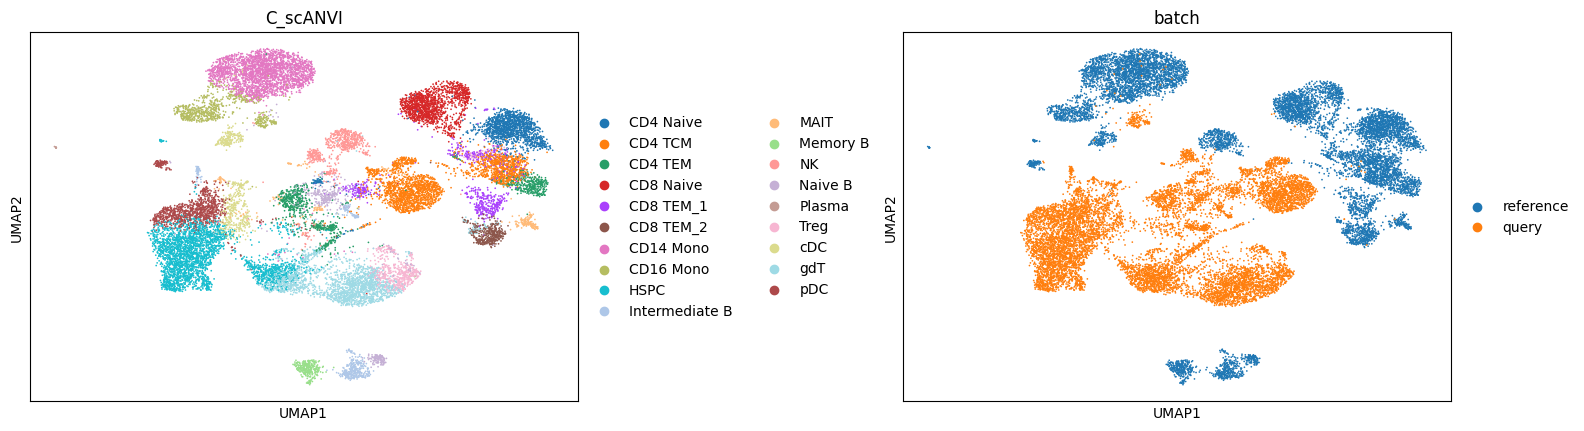

In [107]:
data.obs["C_scANVI"] = lvae.predict(data)
data.obsm["X_scANVI"] = lvae.get_latent_representation(data)
sc.pp.neighbors(data, use_rep="X_scANVI")
sc.tl.umap(data)
sc.pl.umap(data, color=['C_scANVI', "batch"], wspace=0.45)

In [111]:
data

AnnData object with n_obs × n_vars = 19841 × 20169
    obs: 'cell_type', 'batch', '_scvi_batch', '_scvi_labels', 'celltype_scanvi', 'C_scANVI'
    uns: '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'C_scANVI_colors', 'batch_colors'
    obsm: 'X_scANVI', 'X_umap'
    obsp: 'distances', 'connectivities'

In [110]:
data.obs

/usr/local/lib/python3.11/dist-packages/IPython/lib/pretty.py:700: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



,cell_type,batch,_scvi_batch,_scvi_labels,celltype_scanvi,C_scANVI
AAACAGCCAATCCCTT-1_reference,CD4 TCM,reference,0,3,CD4 TCM,CD4 TCM
AAACAGCCAATGCGCT-1_reference,CD4 Naive,reference,0,2,CD4 Naive,CD4 Naive
AAACAGCCACCAACCG-1_reference,CD8 Naive,reference,0,5,CD8 Naive,CD8 Naive
AAACAGCCAGGATAAC-1_reference,CD4 Naive,reference,0,2,CD4 Naive,CD4 Naive
AAACAGCCAGTTTACG-1_reference,CD4 TCM,reference,0,3,CD4 TCM,CD4 TCM
...,...,...,...,...,...,...
TTTGGGATGGCGGTTC_query,NaN,query,1,19,Unknown,HSPC
TTTGGGATGTCCAGCG_query,NaN,query,1,19,Unknown,Treg
TTTGGGATGTGTTCCC_query,NaN,query,1,19,Unknown,Treg
TTTGGGATGTTAGCTG_query,NaN,query,1,19,Unknown,pDC


# Save the predicted cell type labels back to the original cell by bin matrix.

In [113]:
query_data = data[data.obs['batch'] == 'query', :]

In [118]:
query_data.obs

,cell_type,batch,_scvi_batch,_scvi_labels,celltype_scanvi,C_scANVI
AAAAAAAAAAAAAAAA_query,NaN,query,1,19,Unknown,gdT
AAACAACGAACGAGCA_query,NaN,query,1,19,Unknown,cDC
AAACAACGAAGAGGCT_query,NaN,query,1,19,Unknown,HSPC
AAACAACGAAGTCGGA_query,NaN,query,1,19,Unknown,HSPC
AAACAACGACGGTACC_query,NaN,query,1,19,Unknown,Treg
...,...,...,...,...,...,...
TTTGGGATGGCGGTTC_query,NaN,query,1,19,Unknown,HSPC
TTTGGGATGTCCAGCG_query,NaN,query,1,19,Unknown,Treg
TTTGGGATGTGTTCCC_query,NaN,query,1,19,Unknown,Treg
TTTGGGATGTTAGCTG_query,NaN,query,1,19,Unknown,pDC


In [120]:
query_data.write_h5ad('annotated_query_data.h5ad')